In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 # Load the data into the pandas environment and identify some basic details of the dataset

In [5]:
df= pd.read_csv('D:\\dsa\\employee.csv')
df


,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [6]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [8]:
# Reset the index as "name".

In [9]:
df= pd.read_csv('D:\\dsa\\employee.csv',index_col='name')
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [10]:
# Select rows for specific names Jack Morgan and Josh wills

In [11]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [12]:
# Select data for multiple values "Sales" and “Finance”

In [13]:
df[df['department'].isin(['Sales','Finance'])]


,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [14]:
# Display employee who has more than 700 performance score

In [15]:
ind1=df['performance_score']>700
df.loc[ind1]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [16]:
# Check and handle missing values in the dataset

In [17]:
df.isna().sum()


age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [18]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].median())

In [19]:
df['gender']= df['gender'].fillna(df['gender'].mode()[0])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [21]:
# Check the outliers and handle outliers in performance score using Percentiles

{'whiskers': [<matplotlib.lines.Line2D at 0x1e44e689af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e44e6a5190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e44e6896a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e44e6a58b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e44e6a5c40>],
 'means': []}

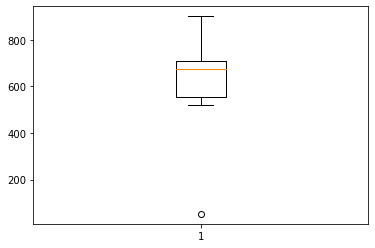

In [22]:
plt.boxplot(df['performance_score'])

In [24]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
df['performance_score'].median()
IQR=Q3-Q1
print(IQR)
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print(low_limit,upp_limit)

556.0 674.0 711.0
155.0
323.5 943.5


In [26]:
outlier=[]
for x in df['performance_score']:
    if((x<low_limit) or (x>upp_limit)):
       outlier.append(x) 
outlier

[53]

In [27]:
ind2=df['performance_score']<low_limit
df.loc[ind2].index

Index(['James Authur'], dtype='object', name='name')

In [28]:
df.drop(['James Authur'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e44ee0fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e44ee1e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e44ee0fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x1e44ee1eb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e44ee1eeb0>],
 'means': []}

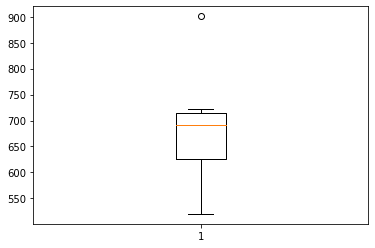

In [29]:
plt.boxplot(df['performance_score'])

In [30]:
# Check the gender column and do Dummy encoding

In [31]:
df.gender.nunique()

2

In [33]:
df=pd.get_dummies(df)

In [34]:
df.head()

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52000.0,723,1,0,0,1,0,0,0,1,0
S Kumar,45.0,16000.0,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.0,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.0,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.0,711,1,0,0,1,0,0,1,0,0


In [35]:
df.columns

Index(['age', 'income', 'performance_score', 'gender_F', 'gender_M',
       'department_Finance', 'department_Operations', 'department_Sales',
       'grade_G0', 'grade_G2', 'grade_G3', 'grade_G4'],
      dtype='object')

In [36]:
df.describe()

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52750.000000,680.37500,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24099.496142,116.16729,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,520.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,625.75000,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52000.000000,691.50000,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,714.00000,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,901.00000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
# Do the standard scaling on the feature performance score

In [38]:
df['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [39]:
x =np.array(df['performance_score']).reshape(-1, 1)

from sklearn import preprocessing 

standardisation = preprocessing.StandardScaler()
data_StdScaled = standardisation.fit_transform(x)

data_StdScaled = pd.DataFrame(data_StdScaled)
data_StdScaled.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
